In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('./data/stock1-cleaned.csv')

# Cleaning Columns

In [3]:
df.columns

Index(['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Simple Moving Average - SMA - SMA(20)',
       'Simple Moving Average - SMA - SMA(50)',
       'Simple Moving Average - SMA - SMA(200)',
       'Exponential Moving Average - EMA - EMA(9,Modern)',
       'Exponential Moving Average - EMA - EMA(61,Modern)',
       'Relative Strength Index - RSI - RSI(14)', 'MACD - MACD(12,26,9)',
       'MACD - Histogram', 'MACD - Signal Line(MACD(12,26,9),9,Modern)'],
      dtype='object')

In [4]:
df.columns.str.strip()

Index(['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Simple Moving Average - SMA - SMA(20)',
       'Simple Moving Average - SMA - SMA(50)',
       'Simple Moving Average - SMA - SMA(200)',
       'Exponential Moving Average - EMA - EMA(9,Modern)',
       'Exponential Moving Average - EMA - EMA(61,Modern)',
       'Relative Strength Index - RSI - RSI(14)', 'MACD - MACD(12,26,9)',
       'MACD - Histogram', 'MACD - Signal Line(MACD(12,26,9),9,Modern)'],
      dtype='object')

In [5]:
# Cleanup the columns.
df.columns = df.columns.str.strip()

In [6]:
df.iloc[0]

Date                                                 06/26/2025
Time                                                    4:00 PM
Open                                                    5601.04
High                                                    5601.04
Low                                                     5597.09
Close                                                   5597.09
Volume                                                      431
Simple Moving Average - SMA - SMA(20)                       0.0
Simple Moving Average - SMA - SMA(50)                       0.0
Simple Moving Average - SMA - SMA(200)                      0.0
Exponential Moving Average - EMA - EMA(9,Modern)            0.0
Exponential Moving Average - EMA - EMA(61,Modern)           0.0
Relative Strength Index - RSI - RSI(14)                     0.0
MACD - MACD(12,26,9)                                        0.0
MACD - Histogram                                            0.0
MACD - Signal Line(MACD(12,26,9),9,Moder

In [7]:
df.iloc[3]

Date                                                 06/27/2025
Time                                                    9:31 AM
Open                                                    5617.75
High                                                    5617.75
Low                                                     5613.64
Close                                                   5613.64
Volume                                                     3406
Simple Moving Average - SMA - SMA(20)                       0.0
Simple Moving Average - SMA - SMA(50)                       0.0
Simple Moving Average - SMA - SMA(200)                      0.0
Exponential Moving Average - EMA - EMA(9,Modern)            0.0
Exponential Moving Average - EMA - EMA(61,Modern)           0.0
Relative Strength Index - RSI - RSI(14)                     0.0
MACD - MACD(12,26,9)                                        0.0
MACD - Histogram                                            0.0
MACD - Signal Line(MACD(12,26,9),9,Moder

In [8]:
df.iloc[-1]

Date                                                  07/02/2025
Time                                                     4:01 PM
Open                                                     5701.76
High                                                     5701.76
Low                                                      5701.76
Close                                                    5701.76
Volume                                                     32025
Simple Moving Average - SMA - SMA(20)                 5693.27975
Simple Moving Average - SMA - SMA(50)                 5683.24615
Simple Moving Average - SMA - SMA(200)               5707.510588
Exponential Moving Average - EMA - EMA(9,Modern)     5697.200763
Exponential Moving Average - EMA - EMA(61,Modern)    5685.803471
Relative Strength Index - RSI - RSI(14)                58.675792
MACD - MACD(12,26,9)                                    5.035659
MACD - Histogram                                        0.406712
MACD - Signal Line(MACD(1

In [9]:
# See https://docs.python.org/3/library/datetime.html
# The hour is not zero padded, so %-I
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %I:%M %p')

In [10]:
df.head(1)

,Date,Time,Open,High,Low,Close,Volume,Simple Moving Average - SMA - SMA(20),Simple Moving Average - SMA - SMA(50),Simple Moving Average - SMA - SMA(200),"Exponential Moving Average - EMA - EMA(9,Modern)","Exponential Moving Average - EMA - EMA(61,Modern)",Relative Strength Index - RSI - RSI(14),"MACD - MACD(12,26,9)",MACD - Histogram,"MACD - Signal Line(MACD(12,26,9),9,Modern)",DateTime
0,06/26/2025,4:00 PM,5601.04,5601.04,5597.09,5597.09,431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-06-26 16:00:00


In [11]:
df['DateTime'].iloc[0], df['DateTime'].iloc[0].hour

(Timestamp('2025-06-26 16:00:00'), 16)

# Create forward-looking price targets

In [12]:
# Original, moved down, moved up.
df['Close'], df['Close'].shift(1), df['Close'].shift(-1)

(0      5597.090
 1      5596.000
 2      5596.000
 3      5613.640
 4      5616.305
          ...   
 528    5696.310
 529    5697.550
 530    5699.825
 531    5699.990
 532    5701.760
 Name: Close, Length: 533, dtype: float64,
 0           NaN
 1      5597.090
 2      5596.000
 3      5596.000
 4      5613.640
          ...   
 528    5698.150
 529    5696.310
 530    5697.550
 531    5699.825
 532    5699.990
 Name: Close, Length: 533, dtype: float64,
 0      5596.000
 1      5596.000
 2      5613.640
 3      5616.305
 4      5623.450
          ...   
 528    5697.550
 529    5699.825
 530    5699.990
 531    5701.760
 532         NaN
 Name: Close, Length: 533, dtype: float64)

In [13]:
def create_price_targets(df, profit_per_trade=10, windows=[5, 10, 15]):
    """
    ARGS
    ----
    profit_per_trade: desired profit per trade. Default to 10$.
    windows: a list of time differences in minutes (or almost minutes).
    """
    for window in windows:
        # Take the diff between current and future values.
        # NOTE: we are doing this to explore features.
        # We should do the shift in the other direction for the backtest.
        df[f'price_change_{window}min'] = df['Close'].shift(-window) - df['Close']

        # Look for periods where move in price was in our favour
        # for either a long or a short position.
        df[f'big_move_{window}min'] = (
                abs(
                    df[f'price_change_{window}min']
                ) > profit_per_trade
        ).astype(int)

        # If the change is +10, the set 1 to mark a bearish stance.
        # If change is -10, then set a -1 for bullish.
        # Else, we sideways and we set a 0.
        df[f'direction_{window}min'] = np.where(
            df[f'price_change_{window}min'] > profit_per_trade,
            1,
            np.where(df[f'price_change_{window}min'] < -profit_per_trade, -1, 0),
        )
    
    # Drop rows where we can't calculate any targets
    df = df.dropna(subset=[f'direction_{max(windows)}min'])
    return df

In [14]:
df = create_price_targets(df)

In [15]:
df.head(2)

,Date,Time,Open,High,Low,Close,Volume,Simple Moving Average - SMA - SMA(20),Simple Moving Average - SMA - SMA(50),Simple Moving Average - SMA - SMA(200),...,DateTime,price_change_5min,big_move_5min,direction_5min,price_change_10min,big_move_10min,direction_10min,price_change_15min,big_move_15min,direction_15min
0,06/26/2025,4:00 PM,5601.04,5601.04,5597.09,5597.09,431,0.0,0.0,0.0,...,2025-06-26 16:00:00,26.360,1,1,30.97,1,1,59.07,1,1
1,06/26/2025,4:01 PM,5596.00,5596.00,5596.00,5596.00,37413,0.0,0.0,0.0,...,2025-06-26 16:01:00,26.435,1,1,42.46,1,1,64.30,1,1


In [16]:
df.tail(6)

,Date,Time,Open,High,Low,Close,Volume,Simple Moving Average - SMA - SMA(20),Simple Moving Average - SMA - SMA(50),Simple Moving Average - SMA - SMA(200),...,DateTime,price_change_5min,big_move_5min,direction_5min,price_change_10min,big_move_10min,direction_10min,price_change_15min,big_move_15min,direction_15min
527,07/02/2025,3:56 PM,5696.710,5698.15,5696.710,5698.150,300,5687.392125,5677.888928,5709.216978,...,2025-07-02 15:56:00,3.61,0,0,NaN,0,0,NaN,0,0
528,07/02/2025,3:57 PM,5695.530,5696.31,5693.050,5696.310,400,5688.208125,5678.777378,5708.752328,...,2025-07-02 15:57:00,NaN,0,0,NaN,0,0,NaN,0,0
529,07/02/2025,3:58 PM,5691.975,5702.12,5691.975,5697.550,400,5689.450125,5679.770178,5708.258063,...,2025-07-02 15:58:00,NaN,0,0,NaN,0,0,NaN,0,0
530,07/02/2025,3:59 PM,5700.570,5700.57,5699.280,5699.825,300,5690.542875,5680.958578,5708.104338,...,2025-07-02 15:59:00,NaN,0,0,NaN,0,0,NaN,0,0
531,07/02/2025,4:00 PM,5700.365,5700.41,5695.440,5699.990,1100,5691.991875,5682.010978,5707.771788,...,2025-07-02 16:00:00,NaN,0,0,NaN,0,0,NaN,0,0
532,07/02/2025,4:01 PM,5701.760,5701.76,5701.760,5701.760,32025,5693.279750,5683.246150,5707.510588,...,2025-07-02 16:01:00,NaN,0,0,NaN,0,0,NaN,0,0


In [17]:
# Quick correlation check.
indicators = [
    'Simple Moving Average - SMA - SMA(20)',
    'Simple Moving Average - SMA - SMA(50)',
    'Simple Moving Average - SMA - SMA(200)',
    'Exponential Moving Average - EMA - EMA(9,Modern)',
    'Exponential Moving Average - EMA - EMA(61,Modern)',
    'Relative Strength Index - RSI - RSI(14)',
    'MACD - MACD(12,26,9)',
    'MACD - Histogram', 'MACD - Signal Line(MACD(12,26,9),9,Modern)'
]

for indicator in indicators:
    if indicator in df.columns:
        corr_5min = df[indicator].corr(df['direction_5min'])
        corr_10min = df[indicator].corr(df['direction_10min'])
        print(f"{indicator[:80]:<50} 5min: {corr_5min:>3.3f} 10min: {corr_10min:>3.3f}")

Simple Moving Average - SMA - SMA(20)              5min: -0.200 10min: -0.182
Simple Moving Average - SMA - SMA(50)              5min: -0.161 10min: -0.237
Simple Moving Average - SMA - SMA(200)             5min: -0.048 10min: -0.019
Exponential Moving Average - EMA - EMA(9,Modern)   5min: -0.160 10min: -0.158
Exponential Moving Average - EMA - EMA(61,Modern)  5min: -0.132 10min: -0.160
Relative Strength Index - RSI - RSI(14)            5min: -0.184 10min: -0.166
MACD - MACD(12,26,9)                               5min: -0.061 10min: -0.005
MACD - Histogram                                   5min: -0.102 10min: -0.134
MACD - Signal Line(MACD(12,26,9),9,Modern)         5min: -0.043 10min: 0.003


# More Features

In [18]:
def engineer_features(df):
    """Create features that might better predict directional moves"""
    
    # Price momentum features
    df['price_momentum_3'] = df['Close'].pct_change(3)
    df['price_momentum_5'] = df['Close'].pct_change(5)
    
    # Volume-price relationship
    df['volume_ma'] = df['Volume'].rolling(20).mean()
    df['volume_ratio'] = df['Volume'] / df['volume_ma']
    df['price_volume_trend'] = df['Close'].pct_change() * df['volume_ratio']
    
    # Volatility features
    df['volatility_5'] = df['Close'].rolling(5).std()
    df['volatility_20'] = df['Close'].rolling(20).std()
    df['vol_ratio'] = df['volatility_5'] / df['volatility_20']
    
    # Support/resistance levels
    df['high_5'] = df['High'].rolling(5).max()
    df['low_5'] = df['Low'].rolling(5).min()
    df['price_position'] = (df['Close'] - df['low_5']) / (df['high_5'] - df['low_5'])
    
    # Technical divergences
    df['rsi_divergence'] = df['Relative Strength Index - RSI - RSI(14)'].diff(5)
    df['macd_momentum'] = df['MACD - Histogram'].diff(3)
    
    # Time-based features
    df['hour'] = df['DateTime'].dt.hour
    df['is_opening'] = (df['hour'] >= 9) & (df['hour'] <= 10)
    df['is_closing'] = (df['hour'] >= 15) & (df['hour'] <= 16)
    
    return df

In [19]:
df = engineer_features(df)

# Now test correlations with your new features.
new_features = [
    'price_momentum_3',
    'price_momentum_5',
    'volume_ratio', 
    'price_volume_trend',
    'vol_ratio',
    'price_position', 
    'rsi_divergence',
    'macd_momentum',
]

for feature in new_features:
    if feature in df.columns:
        corr_5min = df[feature].corr(df['direction_5min'])
        corr_10min = df[feature].corr(df['direction_10min'])
        print(f"{feature:<25} 5min: {corr_5min:>6.3f} 10min: {corr_10min:>6.3f}")

price_momentum_3          5min: -0.078 10min: -0.083
price_momentum_5          5min: -0.075 10min: -0.137
volume_ratio              5min: -0.015 10min: -0.002
price_volume_trend        5min: -0.118 10min: -0.051
vol_ratio                 5min:  0.021 10min:  0.076
price_position            5min: -0.092 10min: -0.070
rsi_divergence            5min: -0.006 10min: -0.074
macd_momentum             5min: -0.054 10min: -0.175


1. **Weak correlations = reality** - If 0.8+ correlations existed, algos would have arbitraged them away instantly
1. **Negative correlations = lag effect** - Most indicators are backward-looking. When RSI hits 70, the big move might already be over
1. **Less "smoothed" = higher correlation** - Raw price momentum and short SMAs beat heavily processed indicators like MACD signal lines


Example scenario:

1. Minute 1-10: Price drops from \\$ 100 to \\$95 (SMA still high ~\\$98)
1. Minute 11: Price at \\$95, SMA at \\$98 (SMA > Price)
1. Minute 12-15: Price bounces back to \\$105 (your +1 target triggered)

Result: When SMA > Price (positive indicator), you get bullish moves (+1 target)
But your correlation shows: High SMA → Low direction score
This seems backwards, but it's because SMA is "catching up" to old price action.

In [20]:
# 1. Lead instead of lag - use price action to predict indicators.
def create_leading_features(df):
    """Instead of using indicators to predict price, use price patterns to predict momentum
    
    
    # First .diff() = velocity (speed of change).
    df['velocity'] = df['Close'].diff()  # Today's price - yesterday's price
    
    # Second .diff() = acceleration (change in velocity).
    df['acceleration'] = df['Close'].diff().diff()  # Today's velocity - yesterday's velocity
    
    # With shift parameter.
    df['accel_3'] = df['Close'].diff().diff(3)  # Acceleration over 3 periods
    """
    
    # Price acceleration (2nd derivative).
    df['price_accel_3'] = df['Close'].diff().diff(3)
    df['price_accel_5'] = df['Close'].diff().diff(5)
    
    # Breakout patterns.
    # # WITHOUT shift (wrong):
    #   df['breakout_high'] = (df['Close'] > df['High'].rolling(10).max())
    # This includes TODAY'S high in the calculation - data leakage!
    #
    # WITH shift (correct):
    #   df['breakout_high'] = (df['Close'] > df['High'].rolling(10).max().shift(1))
    # This only looks at the previous 10 periods' highs - no future info.
    df['breakout_high'] = (df['Close'] > df['High'].rolling(10).max().shift(1)).astype(int)
    df['breakout_low'] = (df['Close'] < df['Low'].rolling(10).min().shift(1)).astype(int)
    
    # Order flow proxies.
    df['buy_pressure'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])
    df['sell_pressure'] = (df['High'] - df['Close']) / (df['High'] - df['Low'])
    
    return df

# 2. Combine features for regime detection.
def create_regime_features(df):
    """Market behaves differently in different conditions"""
    
    # High volatility periods (where your $10 moves are more likely)
    df['high_vol_period'] = (df['vol_ratio'] > 1.2).astype(int)
    
    # Momentum alignment
    df['momentum_aligned'] = (
        (df['price_momentum_3'] > 0) & (df['price_momentum_5'] > 0)
    ).astype(int)
    
    return df

In [21]:
df = create_leading_features(df)
df = create_regime_features(df)


# Now test correlations with your new features.
new_features = [
    'price_accel_3',
    'price_accel_5',
    'breakout_high',
    'breakout_low',
    'buy_pressure',
    'sell_pressure',
    'high_vol_period',
    'momentum_aligned',
]

for feature in new_features:
    if feature in df.columns:
        corr_5min = df[feature].corr(df['direction_5min'])
        corr_10min = df[feature].corr(df['direction_10min'])
        print(f"{feature:<25} 5min: {corr_5min:>6.3f} 10min: {corr_10min:>6.3f}")

price_accel_3             5min: -0.083 10min: -0.017
price_accel_5             5min: -0.096 10min: -0.031
breakout_high             5min: -0.058 10min: -0.042
breakout_low              5min:  0.108 10min:  0.028
buy_pressure              5min: -0.099 10min: -0.173
sell_pressure             5min:  0.099 10min:  0.173
high_vol_period           5min:  0.013 10min:  0.068
momentum_aligned          5min: -0.039 10min: -0.046


In [22]:
def create_multi_timeframe_features(df):
    """Look at multiple timeframes for better context"""
    
    # Short-term trend (3-5 minutes)
    df['short_trend'] = np.where(df['Close'] > df['Close'].shift(3), 1, 
                                np.where(df['Close'] < df['Close'].shift(3), -1, 0))
    
    # Medium-term trend (10-15 minutes)  
    df['medium_trend'] = np.where(df['Close'] > df['Close'].shift(10), 1,
                                 np.where(df['Close'] < df['Close'].shift(10), -1, 0))
    
    # Trend alignment score
    df['trend_alignment'] = df['short_trend'] + df['medium_trend']
    
    return df

In [23]:
def detect_market_regime(df):
    """Identify different market conditions"""
    
    # Volatility regime
    vol_20 = df['Close'].rolling(20).std()
    df['high_vol_regime'] = vol_20 > vol_20.quantile(0.7)
    
    # Trend regime
    sma_20 = df['Close'].rolling(20).mean()
    df['trending_regime'] = abs(df['Close'] - sma_20) > sma_20.std()
    
    # Volume regime
    vol_ma = df['Volume'].rolling(20).mean()
    df['high_volume_regime'] = df['Volume'] > vol_ma * 1.5
    
    return df

# Finuting a strategy

In [24]:
# Instead of predicting direction, predict:
# 1. When spreads will be widest (your opportunity)
# 2. When volatility will spike (your risk)
# 3. When to size up/down based on confidence

# 1. Find your "sweet spot" conditions
def find_optimal_conditions(df):
    """When does the security give you the best spread opportunities?"""
    
    # Spread proxy (when bid-ask gaps are likely widest)
    df['spread_proxy'] = df['High'] - df['Low']
    df['high_spread'] = df['spread_proxy'] > df['spread_proxy'].quantile(0.8)
    
    # Volume conditions that create opportunities
    df['volume_spike'] = df['Volume'] > df['Volume'].rolling(20).mean() * 1.5
    df['low_volume'] = df['Volume'] < df['Volume'].rolling(20).mean() * 0.5
    
    return df

# 2. Backtest your strategy success rate
def backtest_spread_strategy(df):
    """Test: if you entered at spread, what % hit your targets?"""
    
    # Simulate your entries (assume you can enter at Low when trending up)
    df['entry_long'] = df['Low']
    df['entry_short'] = df['High']
    
    # Check if $10+ moves happened in next 5-15 minutes
    for window in [5, 10, 15]:
        # Long success: price went up $10+ from entry
        df[f'long_success_{window}'] = (df['High'].rolling(window).max().shift(-window) - df['entry_long']) >= 10
        
        # Short success: price went down $10+ from entry  
        df[f'short_success_{window}'] = (df['entry_short'] - df['Low'].rolling(window).min().shift(-window)) >= 10
    
    return df

# 3. Find time-based patterns
def analyze_time_patterns(df):
    """When during the day do you get best opportunities?"""
    
    # Parse time properly
    df['hour'] = df['DateTime'].dt.hour
    df['minute'] = df['DateTime'].dt.minute
    
    # Group by hour and see success rates
    hourly_stats = df.groupby('hour').agg({
        'spread_proxy': 'mean',
        'Volume': 'mean',
        'long_success_10': 'mean',
        'short_success_10': 'mean'
    })
    
    return hourly_stats

In [25]:
df = find_optimal_conditions(df)
df = backtest_spread_strategy(df)

In [42]:
def plot_spread_analysis(df, desired_date):    
    recent_data = df[df['DateTime'].dt.date == desired_date].copy()
    
    # Get first 15 minutes (9:30 to 9:45).
    first_15min = recent_data[recent_data['DateTime'].dt.time <= datetime.time(9, 45)]
    max_15min = first_15min['High'].max()
    min_15min = first_15min['Low'].min()

    # Determine line color based on trend vs previous close.
    current_close = first_15min['Close'].iloc[-1]

    prev_dates = df[df['DateTime'].dt.date < desired_date]['DateTime'].dt.date.unique()
    if len(prev_dates) > 0:
        prev_date = max(prev_dates)  # Most recent date before today
        print(f'using {prev_date} as previous date')
        prev_close_data = df[df['DateTime'].dt.date == prev_date]
        prev_close = prev_close_data['Close'].iloc[-1]
        line_color = 'green' if current_close > prev_close else 'red'
    else:
        print('no data for previous day found')
        line_color = 'black'

    
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1])
    fig, ax1 = plt.subplots(figsize=(15, 10))
    
    # ===== MAIN CANDLESTICK CHART =====
    for i, (idx, row) in enumerate(recent_data.iterrows()):
        open_price = row['Open']
        close_price = row['Close']
        high_price = row['High']
        low_price = row['Low']
        
        # Determine candle color
        color = 'green' if close_price > open_price else 'red'
        
        # Draw the high-low line
        ax1.plot([i, i], [low_price, high_price], color=color, linewidth=1)
        
        # Draw the open-close rectangle
        height = abs(close_price - open_price)
        bottom = min(open_price, close_price)
        rect = Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, alpha=0.7, edgecolor=color)
        ax1.add_patch(rect)
    
    # Overlay moving averages
    #ax1.plot(range(len(recent_data)), recent_data['Simple Moving Average - SMA - SMA(20)'], 
    #        label='SMA 20', color='blue', linewidth=1.5)
    #ax1.plot(range(len(recent_data)), recent_data['Simple Moving Average - SMA - SMA(50)'], 
    #        label='SMA 50', color='orange', linewidth=1.5)
    
    # ===== OVERLAY SPREAD OPPORTUNITIES =====
    # High spread periods (your best setups)
    #high_spread_indices = [i for i, val in enumerate(recent_data['high_spread']) if val]
    #for idx in high_spread_indices:
    #    ax1.axvspan(idx-0.5, idx+0.5, alpha=0.3, color='yellow', label='High Spread' if idx == high_spread_indices[0] else "")
    
    # Volume spikes (potential big moves)
    vol_spike_indices = [i for i, val in enumerate(recent_data['volume_spike']) if val]
    #for idx in vol_spike_indices:
    #    ax1.scatter(idx, recent_data.iloc[idx]['High'] + 1, color='red', s=50, marker='^', 
    #               label='Volume Spike' if idx == vol_spike_indices[0] else "")
    
    # Successful setups (where your strategy would have worked)
    #success_indices = [i for i, val in enumerate(recent_data['long_success_10']) if val]
    #for idx in success_indices:
    #    ax1.scatter(idx, recent_data.iloc[idx]['Low'] - 1, color='lime', s=30, marker='o',
    #               label='Successful Setup' if idx == success_indices[0] else "")

    # Plot horizontal lines for first 15min high/low.
    ax1.axhline(y=max_15min, color=line_color, linestyle='-', linewidth=3, alpha=0.6, label=f'15min High: ${max_15min:.2f}')
    ax1.axhline(y=min_15min, color=line_color, linestyle='-', linewidth=3, alpha=0.6, label=f'15min Low: ${min_15min:.2f}')

    ax1.set_ylabel('Price ($)')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # ===== VOLUME SUBPLOT =====
    #ax2.bar(range(len(recent_data)), recent_data['Volume'], alpha=0.7, color='blue')
    # Highlight volume spikes
    #for idx in vol_spike_indices:
    #    ax2.bar(idx, recent_data.iloc[idx]['Volume'], color='red', alpha=0.8)
    
    #ax2.set_title('Volume')
    #ax2.set_ylabel('Volume')
    #ax2.set_xlabel('Time Period')
    #ax2.grid(True, alpha=0.3)
    
    # Format x-axis with time labels.
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    time_labels = [recent_data.iloc[i]['Time'] for i in range(0, len(recent_data), max(1, len(recent_data)//15))]
    ax1.set_xticks(range(0, len(recent_data), max(1, len(recent_data)//15)))
    ax1.set_xticklabels(time_labels, rotation=45)
    
    plt.tight_layout()
    plt.show()

using 2025-07-01 as previous date


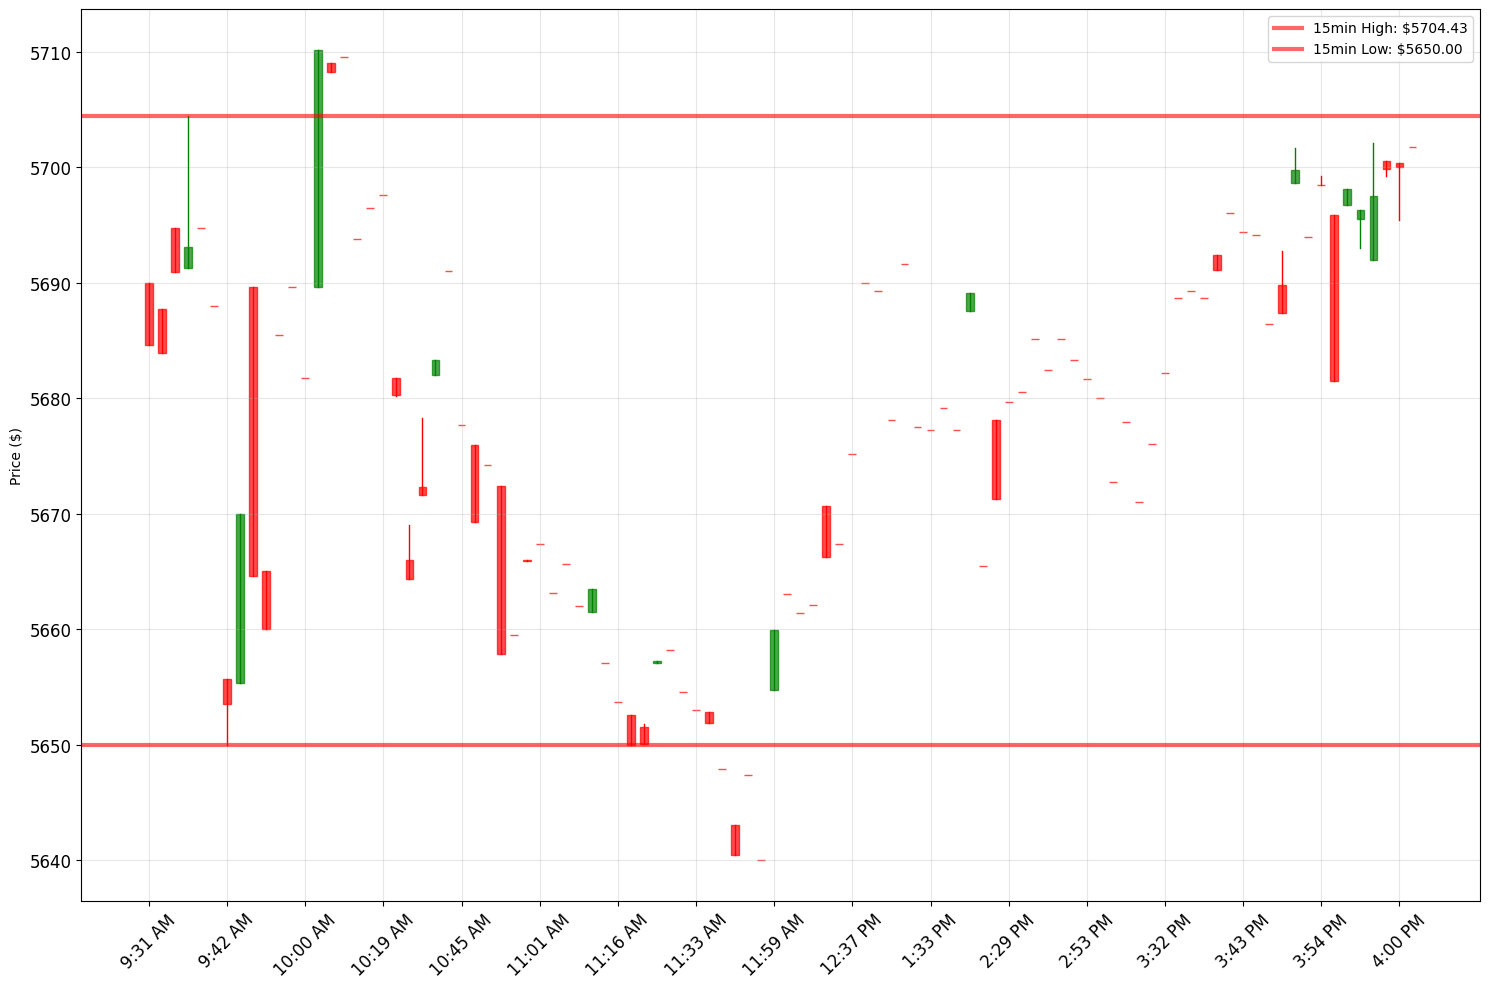

In [43]:
plot_spread_analysis(df, datetime.date(2025, 7, 2))

using 2025-06-30 as previous date


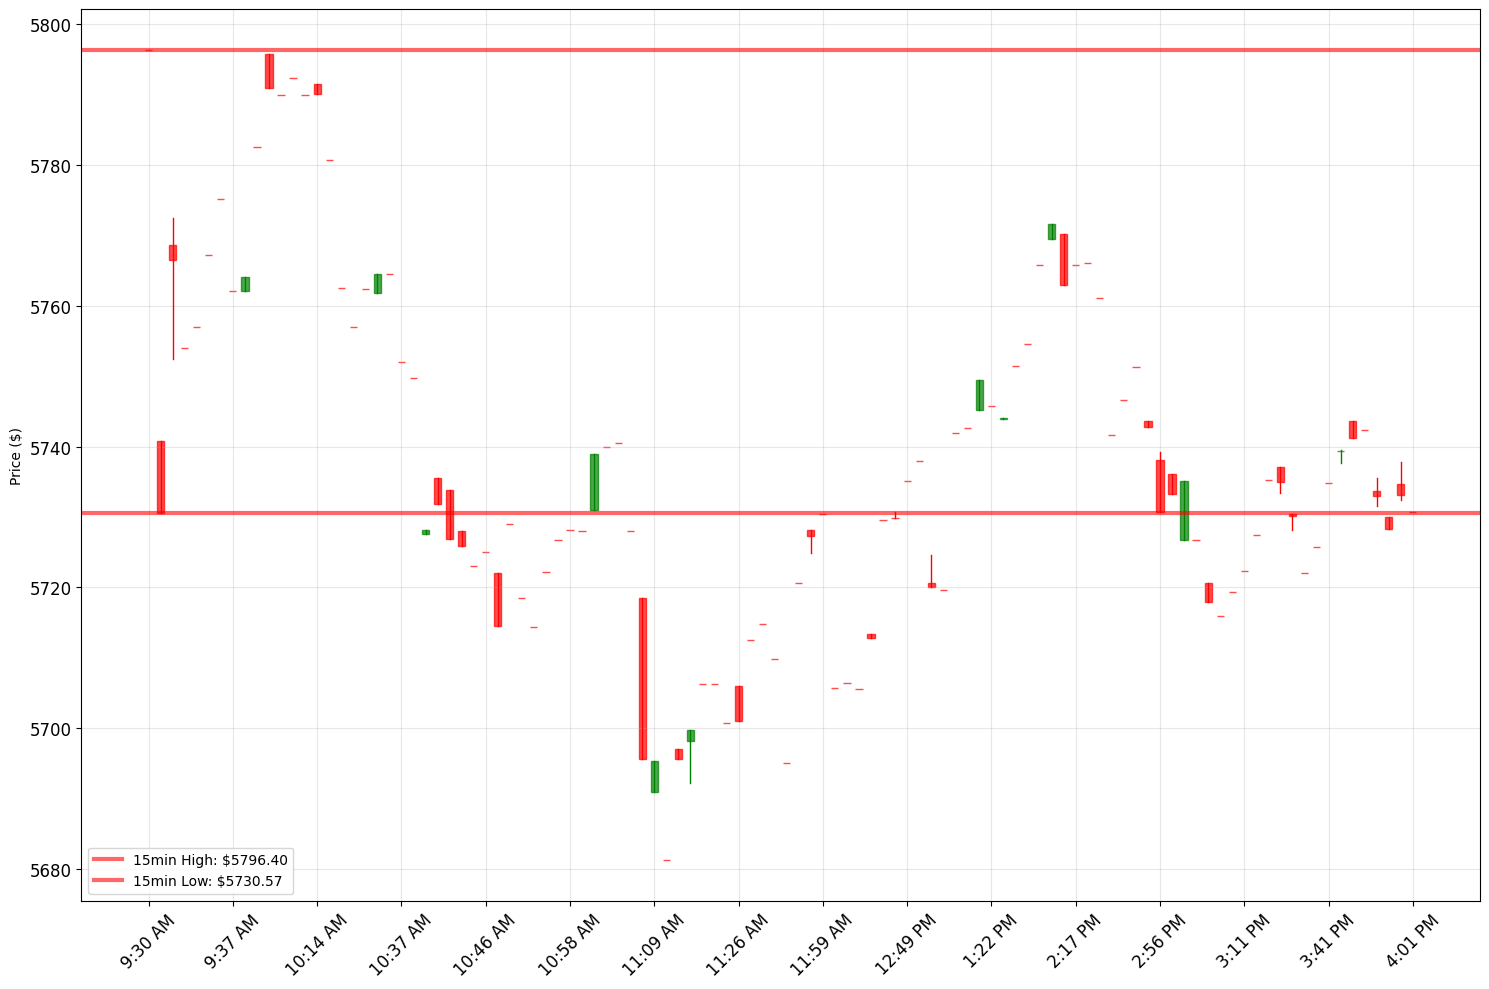

In [44]:
plot_spread_analysis(df, datetime.date(2025, 7, 1))

using 2025-06-27 as previous date


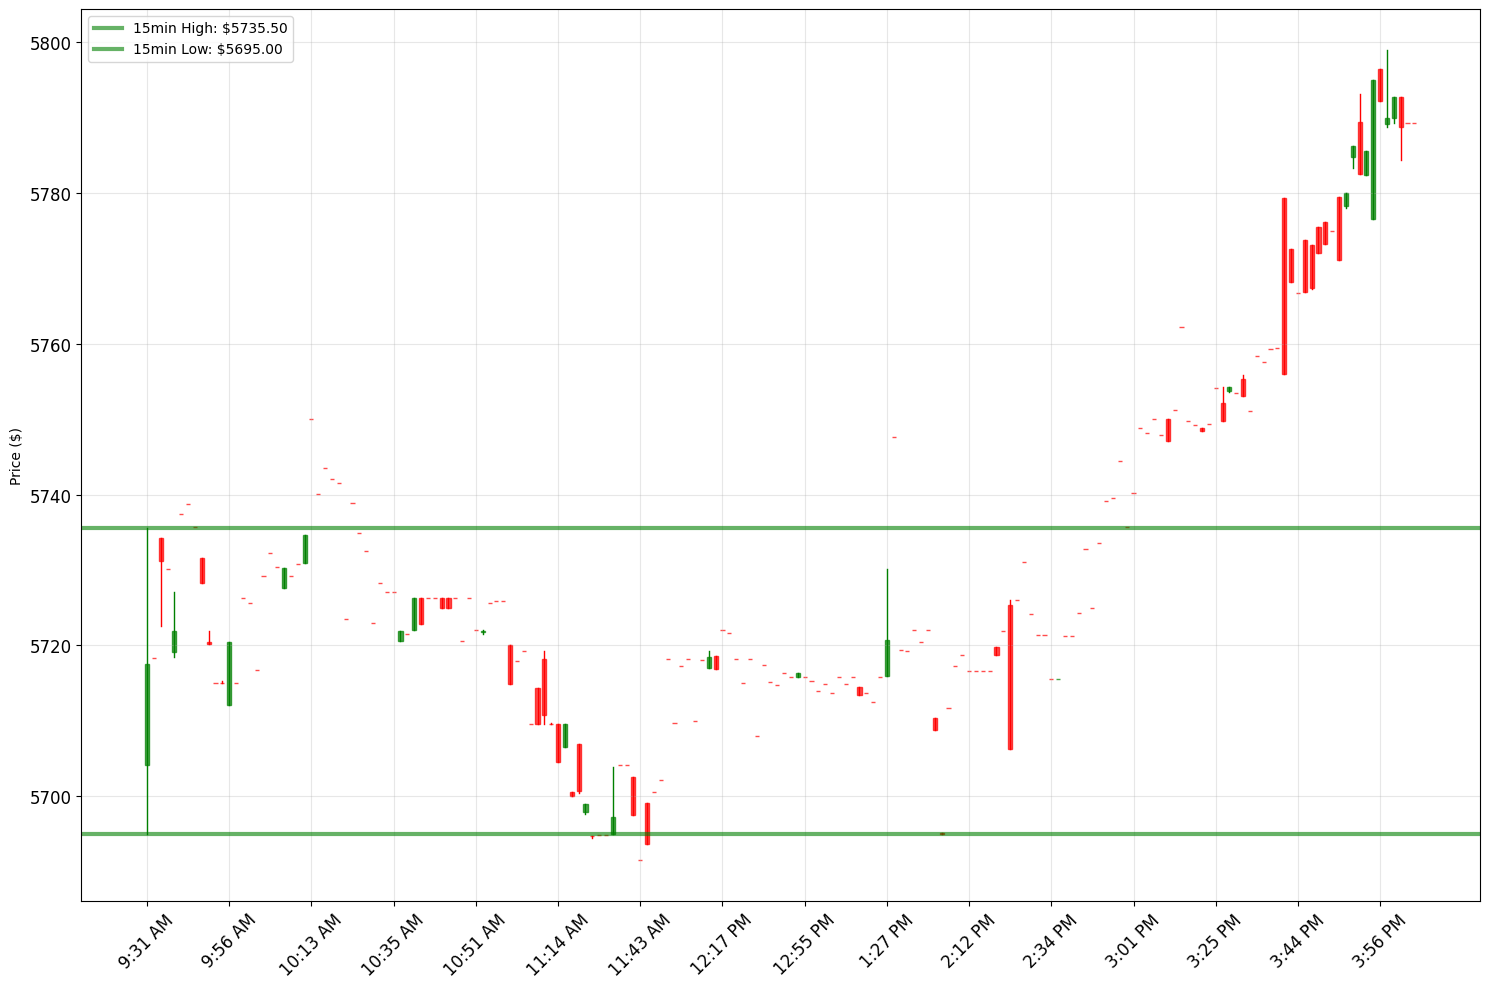

In [45]:
plot_spread_analysis(df, datetime.date(2025, 6, 30))